In [1]:
from ontology_algorithm import (
    draw_hierarchy_tree_from_ontology,
)
from integrative_worklow import (
    construct_topic_modeling_concept_hierarchy,
)
import re

## Preprocessing

We will preprocess words from the theology reconsidered text using tf-idf and extract the top n words.

In [2]:
theology_reconsidered_path = "/Users/zebo/Documents/Freelancing/upwork/Peter_J_Worth_Jr/NLP/hierarchical_clustering/data/theology_reconsidered.txt"

with open(theology_reconsidered_path, "r") as f:
    theology_reconsidered = f.read()


def split_into_chapters(input_filename, verbose=False):
    """Split the input file into chapters."""
    titles = []
    chapters = []
    # Open the input file and read its contents
    with open(input_filename, "r", encoding="utf-8") as input_file:
        contents = input_file.read()

    # Split the contents into chunks based on the separator criteria
    chunks = contents.split("\n\n\n\n")  # empty lines in the text

    ch_cnt = 0

    # Create an output file for each chunk
    for i, chunk in enumerate(chunks):
        # Skip empty chunks
        if not chunk.strip():
            continue

        # Extract the title and content from the chunk
        lines = chunk.strip().split("\n")
        title = lines[0]
        content = "\n".join(lines[1:])

        if verbose:
            print("processing CH" + str(ch_cnt) + ": " + title + "...")

        # Create the output file
        chapters.append(content)
        titles.append(title)

        ch_cnt += 1
    return titles, chapters


titles, chapters = split_into_chapters(theology_reconsidered_path)

chapters[0]

# Should I remove the word Figure?

# Remove \n from the chapters.
chapters = [chapter.replace("\n", "") for chapter in chapters]
# Remove \t from the chapters.
chapters = [chapter.replace("\t", " ") for chapter in chapters]


# import re

# Separate the chapters into sentences.
sentences_per_chapter_prep = [re.split("\.  ", chapter) for chapter in chapters]
sentences_per_chapter_prep = [
    [sentence + "." for sentence in chapter] for chapter in sentences_per_chapter_prep
]

sentences_per_chapter = []
for chapter_prep in sentences_per_chapter_prep:
    chapter = []
    for sentence in chapter_prep:
        chapter.extend(re.split("(?<!i.e|etc|e.g|iii)\. ", sentence))
    sentences_per_chapter.append(chapter)

# sentences_per_chapter[0]
for title_index, title in enumerate(titles):
    print(title_index, title)

0 Introduction
1 Prologue: Mythos and Mysticism in Antiquity
2 A Brief History of the Mystical Arts: Beyond Yoga
3 Meditation as a Mystical Art: A Bridge Through Time 
4 Overarching Themes: The Laurasian Hypothesis and a New Metaphysics
5 Setting the Stage: A Brief of History of Modern Man
6 Part I: On Creation Mythos (Cosmogony)
7 From Language to Writing: The Dawn of History
8 The Ancient Hebrews: The Tanakh, Torah and Five Books of Moses
9 Ancient Egyptian Mythos: The Weighing of the Heart, Ra and Ma'at
10 The Enûma Eliš: Sumer- Babylonian Creation Mythos
11 Ancient Persian Theology: Zarathustra and the Avesta
12 Classic Hellenic Theogony: Chaos, Chronos and Eros
13 Orphic Theogony: Thanes and the Great Cosmic Egg
14 Vedic Cosmogony: Skepticism, Puruṣa and Hiraṇyagarbha 
15 Ancient Chinese Theology: Shàngdì, Pángǔ, Tiān and the Dao
16 Roman Cosmogony: The Metamorphoses of Ovid
17 Eurasian Mythos: Establishing the Laurasian Hypothesis 
18 Part II: On Ancient Philosophy (Logos)
19 Fro

In [3]:
# Remove chapters, titles and sentences if the title starts with "Part ".
title_indices_to_remove = [
    title_index for title_index, title in enumerate(titles) if title.startswith("Part ")
]

titles = [
    title
    for title_index, title in enumerate(titles)
    if title_index not in title_indices_to_remove
]
sentences_per_chapter = [
    chapter
    for chapter_index, chapter in enumerate(sentences_per_chapter)
    if chapter_index not in title_indices_to_remove
]
chapters = [
    chapter
    for chapter_index, chapter in enumerate(chapters)
    if chapter_index not in title_indices_to_remove
]

## Contruct the ontology tree using the integrative workflow

CLUSTER #1
Cluster Chapters: [1, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 28, 30]
Key Features: ['ancient', 'tradition', 'creation', 'gods', 'mythos', 'also', 'well', 'one', 'greek', 'philosophical']
CLUSTER #2
Cluster Chapters: [43, 51]
Key Features: ['quality', 'pirsig', 'static', 'metaphysics', 'dynamic', 'experience', 'reality', 'subject object', 'metaphysics quality', 'static quality']
CLUSTER #3
Cluster Chapters: [20, 21, 23, 24, 27, 45]
Key Features: ['knowledge', 'plato', 'brahman', 'socrates', 'suffering', 'philosophical', 'soul', 'vedānta', 'one', 'philosophy']
CLUSTER #4
Cluster Chapters: [0, 2, 3, 4, 5, 22, 29, 31, 46, 47]
Key Features: ['philosophical', 'yoga', 'ramakrishna', 'ancient', 'well', 'theo', 'philosophy', 'work', 'theo philosophical', 'also']
CLUSTER #5
Cluster Chapters: [37, 38, 39, 40, 41, 48]
Key Features: ['quantum', 'mechanics', 'theory', 'reality', 'relativity', 'quantum theory', 'einstein', 'quantum mechanics', 'subatomic', 'physics']
CLUSTER #6
Cluster Chapte

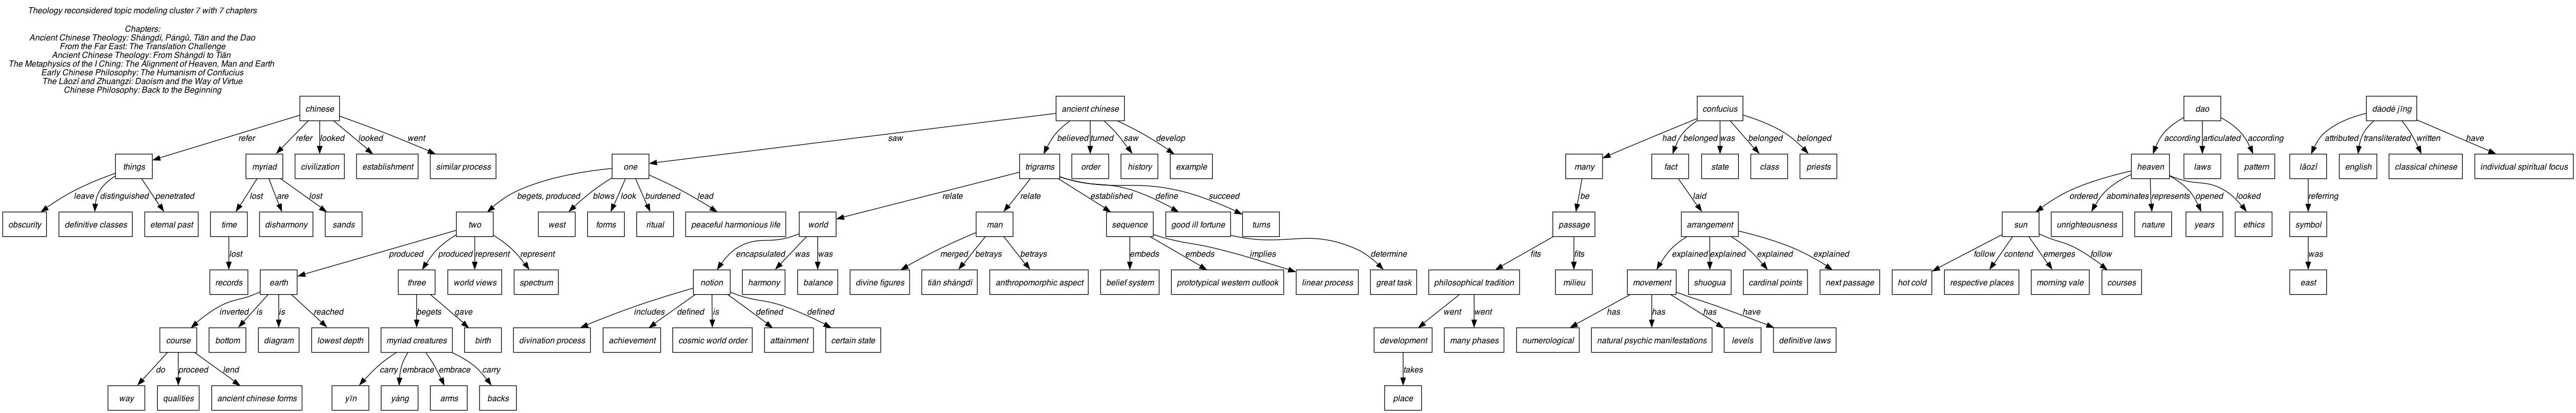

In [4]:
(ontology_hierarchy, all_relations_to_verbs, chapter_titles) = construct_topic_modeling_concept_hierarchy(
    chapters=chapters,
    titles=titles,
    sentences_per_chapter=sentences_per_chapter,
    num_topics=8,
    chosen_cluster=7,
    hierarchy_depth=5,
    hierarchy_max_width=5,
    n_key_terms=10,
    manually_added_roots=["dàodé jīng"],
    verbose=True,
)
# Draw the ontology hierarchy.
draw_hierarchy_tree_from_ontology(
    ontological_hierarchy=ontology_hierarchy,
    relations_to_verbs=all_relations_to_verbs,
    title="Theology reconsidered topic modeling cluster "
    + str(7)
    + " with "
    + str(len(chapter_titles))
    + " chapters",
    topic_modelling_chapters=chapter_titles,
)